In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import zipfile
pd.set_option("display.max_columns", None)
#local_zip = 'Datasets/02-14-2018.zip'
#zip_ref = zipfile.ZipFile(local_zip,'r' )
#zip_ref.extractall('Datasets/archive-IDS')
#zip_ref.close()

In [2]:
df = pd.read_csv('../input/ids-intrusion-csv/02-14-2018.csv')

In [3]:
df= df.iloc[:,[0,1,3,4,5,79]]

In [4]:
df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
0,0,0,112641719,3,0,Benign
1,0,0,112641466,3,0,Benign
2,0,0,112638623,3,0,Benign
3,22,6,6453966,15,10,Benign
4,22,6,8804066,14,11,Benign


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Dst Port       1048575 non-null  int64 
 1   Protocol       1048575 non-null  int64 
 2   Flow Duration  1048575 non-null  int64 
 3   Tot Fwd Pkts   1048575 non-null  int64 
 4   Tot Bwd Pkts   1048575 non-null  int64 
 5   Label          1048575 non-null  object
dtypes: int64(5), object(1)
memory usage: 48.0+ MB


In [6]:
df["Label"].value_counts()

Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64

In [7]:
#_=df["Label"].value_counts().plot.bar(rot =0)
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go

fig = go.Figure(data=[
    go.Bar(name='Benign', 
           y=df["Label"].value_counts().values[0:1],
           x=['Benign'],
           text = df["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='FTP-BruteForce', 
           y=df["Label"].value_counts().values[1:2],
           x=['FTP-BruteForce'],
           text = df["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='SSH-Bruteforce', 
           y=df["Label"].value_counts().values[2:],
           x=['SSH-Bruteforce'],
           text = df["Label"].value_counts()[2:],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

In [8]:
df_dataset = df

In [9]:
df_dataset.replace(to_replace=["FTP-BruteForce", "SSH-Bruteforce"], value="Malicious", inplace=True)

In [10]:
df["Label"].value_counts()

Label
Benign       667626
Malicious    380949
Name: count, dtype: int64

In [11]:
df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
0,0,0,112641719,3,0,Benign
1,0,0,112641466,3,0,Benign
2,0,0,112638623,3,0,Benign
3,22,6,6453966,15,10,Benign
4,22,6,8804066,14,11,Benign
...,...,...,...,...,...,...
1048570,80,6,10156986,5,5,Benign
1048571,80,6,117,2,0,Benign
1048572,80,6,5095331,3,1,Benign
1048573,80,6,5235511,3,1,Benign


In [12]:
#_=df["Label"].value_counts().plot.bar(rot =0)
fig = go.Figure(data=[
    go.Bar(name='Benign', 
           y=df["Label"].value_counts().values[0:1],
           x=['Benign'],
           text = df["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicius', 
           y=df["Label"].value_counts().values[1:2],
           x=['Malicious'],
           text = df["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',),

])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

In [13]:
df1 = df[df["Label"] == "Benign"][:380943]
df2 = df[df["Label"] == "Malicious"][:380943]
df_equal = pd.concat([df1, df2], axis=0).reset_index(drop=True)

In [14]:
df_equal

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
0,0,0,112641719,3,0,Benign
1,0,0,112641466,3,0,Benign
2,0,0,112638623,3,0,Benign
3,22,6,6453966,15,10,Benign
4,22,6,8804066,14,11,Benign
...,...,...,...,...,...,...
761881,22,6,6,1,1,Malicious
761882,21,6,1,1,1,Malicious
761883,21,6,2,1,1,Malicious
761884,22,6,7,1,1,Malicious


In [15]:
df_equal.replace(to_replace="Benign", value=0, inplace=True)
df_equal.replace(to_replace="Malicious", value=1, inplace=True)
data = df_equal.dropna()


<ipython-input-15-de07ef68e051>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [16]:
from sklearn.model_selection import train_test_split
RANDOM_STATE_SEED = 12
train, test = train_test_split(data, test_size=0.3, random_state=RANDOM_STATE_SEED)


In [17]:
# display columns
train.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'Label'],
      dtype='object')

In [18]:
# feature info
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533320 entries, 295203 to 472907
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Dst Port       533320 non-null  int64
 1   Protocol       533320 non-null  int64
 2   Flow Duration  533320 non-null  int64
 3   Tot Fwd Pkts   533320 non-null  int64
 4   Tot Bwd Pkts   533320 non-null  int64
 5   Label          533320 non-null  int64
dtypes: int64(6)
memory usage: 28.5 MB


In [19]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler().fit(train[['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts']])

In [20]:
numerical_columns = ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts']

In [21]:
train[numerical_columns] = min_max_scaler.transform(train[numerical_columns])

In [22]:
train

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
295203,0.804508,0.352941,0.999869,0.000202,0.000000,0
48210,0.583135,0.352941,0.999869,0.000202,0.000000,0
254487,0.000809,1.000000,0.999869,0.000000,0.000110,0
377018,0.000809,1.000000,0.999869,0.000000,0.000110,0
741998,0.000320,0.352941,0.999869,0.000000,0.000110,1
...,...,...,...,...,...,...
564465,0.000336,0.352941,0.999870,0.004251,0.002422,1
412925,0.000320,0.352941,0.999869,0.000000,0.000110,1
255366,0.006760,0.352941,1.000000,0.001215,0.001101,0
759451,0.000336,0.352941,0.999869,0.000000,0.000110,1


In [23]:
train.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
count,533320.000000,533320.000000,533320.000000,533320.000000,533320.000000,533320.000000
mean,0.056635,0.446630,0.999872,0.001047,0.000748,0.500051
std,0.192522,0.234226,0.001879,0.006917,0.009393,0.500000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000320,0.352941,0.999869,0.000000,0.000110,0.000000
50%,0.000336,0.352941,0.999869,0.000000,0.000110,1.000000
75%,0.002106,0.352941,0.999870,0.001417,0.000771,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533320 entries, 295203 to 472907
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Dst Port       533320 non-null  float64
 1   Protocol       533320 non-null  float64
 2   Flow Duration  533320 non-null  float64
 3   Tot Fwd Pkts   533320 non-null  float64
 4   Tot Bwd Pkts   533320 non-null  float64
 5   Label          533320 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 28.5 MB


In [25]:
target = train['Label']

In [26]:
test[numerical_columns] = min_max_scaler.transform(test[numerical_columns])

In [27]:
test[numerical_columns]

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts
396769,0.000320,0.352941,0.999869,0.000000,0.000110
632406,0.000336,0.352941,0.999870,0.004251,0.002422
5404,0.001221,0.352941,0.999869,0.000405,0.000440
689168,0.000336,0.352941,0.999869,0.000000,0.000110
117027,0.006791,0.352941,0.999871,0.001012,0.000550
...,...,...,...,...,...
200375,0.000809,1.000000,0.999869,0.000000,0.000110
282107,0.775926,0.352941,0.999869,0.000405,0.000110
473535,0.000320,0.352941,0.999869,0.000000,0.000110
759804,0.000320,0.352941,0.999869,0.000000,0.000110


In [28]:
print("Full dataset:\n")
print("Benign: " + str(df_equal["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_equal["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["Label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 380943
Malicious: 380943
---------------
Training set:

Benign: 266633
Malicious: 266687
---------------
Test set:

Benign: 114310
Malicious: 114256


In [29]:
y_train = np.array(train.pop("Label"))# pop removes "Label" from the dataframe
#y_train = np.array(train.pop("Timestamp"))
X_train = train.values

print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(533320, 5)
(533320,)


In [30]:
y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
#y_test = np.array(test.pop("Timestamp"))
X_test = test.values

print(type(X_test))
print(type(y_test))
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(228566, 5)
(228566,)


In [31]:

from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(train)
categorical_columns = categorical_columns_selector(train)

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
preprocessor = ColumnTransformer([
    ('one-hot-encoder', OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    ('standard-scaler', StandardScaler(), numerical_columns)])
X_processed = preprocessor.fit_transform(train)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)


In [35]:
model.fit(train, target)

LogisticRegression(max_iter=500)

In [36]:
predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names





              precision    recall  f1-score   support

           0       1.00      0.79      0.88    114310
           1       0.83      1.00      0.91    114256

    accuracy                           0.90    228566
   macro avg       0.91      0.90      0.89    228566
weighted avg       0.91      0.90      0.89    228566



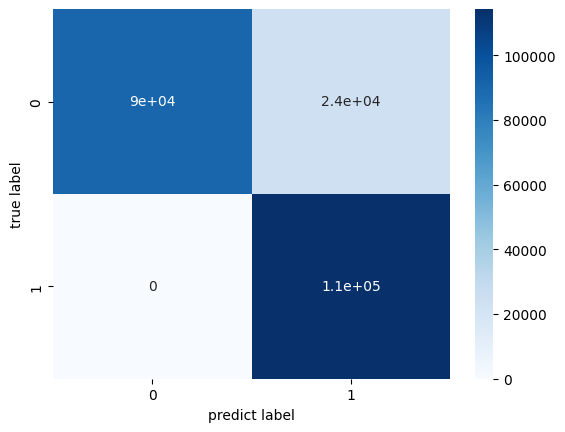

In [37]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
import seaborn as sns
headmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
headmap.set_xlabel('predict label')
headmap.set_ylabel('true label')
print('\n')
from sklearn.metrics import classification_report
report=classification_report(y_test, predictions)
print(report)

In [38]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score


precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
pr_auc = average_precision_score(y_test, y_pred_prob)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'PR-AUC: {pr_auc:.4f}')

Precision: 0.8265
Recall: 1.0000
F1-score: 0.9050
PR-AUC: 0.9395


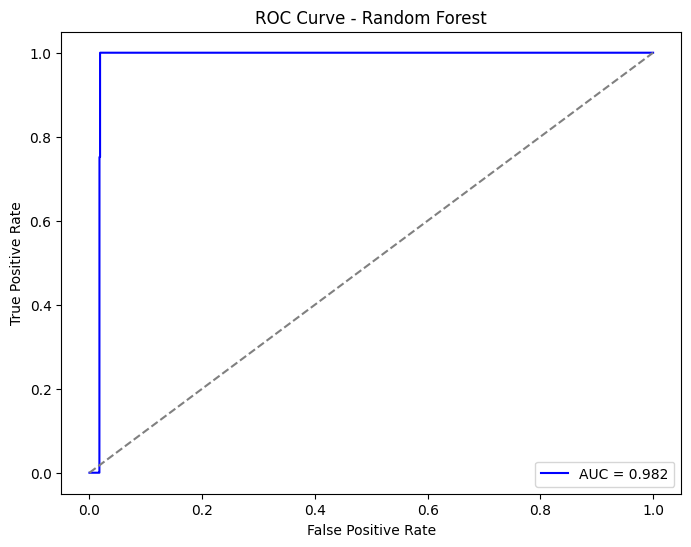

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Tính các giá trị True Positive Rate (TPR) & False Positive Rate (FPR)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Vẽ đồ thị ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Đường chéo ngẫu nhiên
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

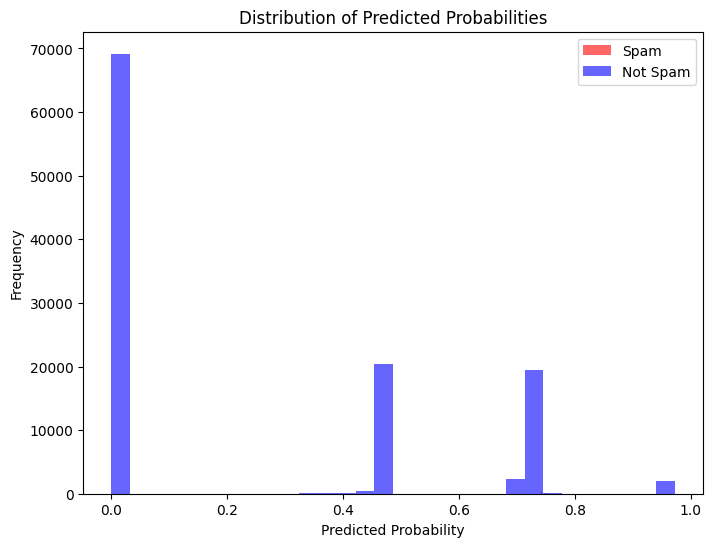

In [41]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob[y_test == 1], bins=30, alpha=0.6, color='red', label="Spam")
plt.hist(y_pred_prob[y_test == 0], bins=30, alpha=0.6, color='blue', label="Not Spam")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.legend()
plt.show()

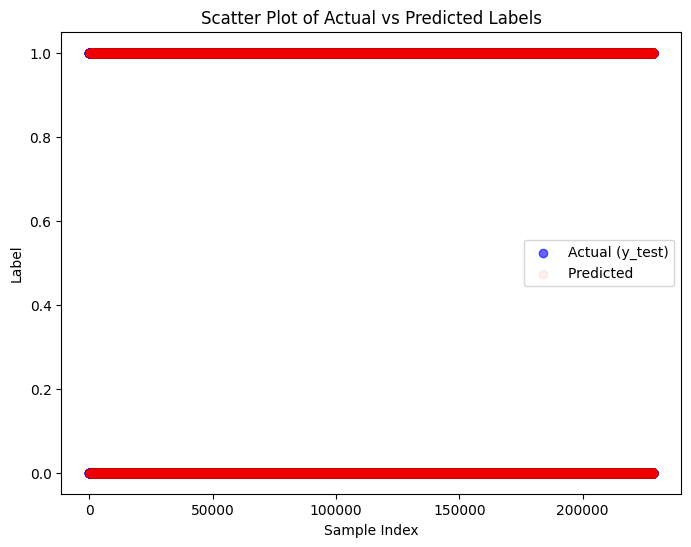

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(y_test)), y_test, color="blue", label="Actual (y_test)", alpha=0.6)
plt.scatter(np.arange(len(predictions)), predictions, color="red", label="Predicted ", alpha=0.06)

plt.xlabel("Sample Index")
plt.ylabel("Label")
plt.title("Scatter Plot of Actual vs Predicted Labels")
plt.legend()
plt.show()


### Random Forest

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#, plot_confusion_matrix
from sklearn.utils import class_weight

RANDOM_STATE_SEED = 12

In [44]:
df_dataset = df


In [45]:
df_dataset.replace(to_replace=["FTP-BruteForce", "SSH-Bruteforce"], value="Malicious", inplace=True)

In [46]:
df["Label"].value_counts()

Label
Benign       667626
Malicious    380949
Name: count, dtype: int64

In [47]:
df1 = df[df["Label"] == "Benign"][:380943]
df2 = df[df["Label"] == "Malicious"][:380943]
df_equal = pd.concat([df1, df2], axis=0).reset_index(drop=True)

In [48]:
df_equal

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
0,0,0,112641719,3,0,Benign
1,0,0,112641466,3,0,Benign
2,0,0,112638623,3,0,Benign
3,22,6,6453966,15,10,Benign
4,22,6,8804066,14,11,Benign
...,...,...,...,...,...,...
761881,22,6,6,1,1,Malicious
761882,21,6,1,1,1,Malicious
761883,21,6,2,1,1,Malicious
761884,22,6,7,1,1,Malicious


In [49]:
df_equal.replace(to_replace="Benign", value=0, inplace=True)
df_equal.replace(to_replace="Malicious", value=1, inplace=True)

<ipython-input-49-b0c53429e182>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [50]:
train, test = train_test_split(df_equal, test_size=0.3, random_state=RANDOM_STATE_SEED)

In [51]:
# display columns
train.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'Label'],
      dtype='object')

In [52]:
# feature info
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533320 entries, 295203 to 472907
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Dst Port       533320 non-null  int64
 1   Protocol       533320 non-null  int64
 2   Flow Duration  533320 non-null  int64
 3   Tot Fwd Pkts   533320 non-null  int64
 4   Tot Bwd Pkts   533320 non-null  int64
 5   Label          533320 non-null  int64
dtypes: int64(6)
memory usage: 28.5 MB


In [53]:
min_max_scaler = MinMaxScaler().fit(train[['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts']])

In [54]:
numerical_columns = ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts']

In [55]:
train[numerical_columns] = min_max_scaler.transform(train[numerical_columns])

In [56]:
train

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
295203,0.804508,0.352941,0.999869,0.000202,0.000000,0
48210,0.583135,0.352941,0.999869,0.000202,0.000000,0
254487,0.000809,1.000000,0.999869,0.000000,0.000110,0
377018,0.000809,1.000000,0.999869,0.000000,0.000110,0
741998,0.000320,0.352941,0.999869,0.000000,0.000110,1
...,...,...,...,...,...,...
564465,0.000336,0.352941,0.999870,0.004251,0.002422,1
412925,0.000320,0.352941,0.999869,0.000000,0.000110,1
255366,0.006760,0.352941,1.000000,0.001215,0.001101,0
759451,0.000336,0.352941,0.999869,0.000000,0.000110,1


In [57]:
train.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
count,533320.000000,533320.000000,533320.000000,533320.000000,533320.000000,533320.000000
mean,0.056635,0.446630,0.999872,0.001047,0.000748,0.500051
std,0.192522,0.234226,0.001879,0.006917,0.009393,0.500000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000320,0.352941,0.999869,0.000000,0.000110,0.000000
50%,0.000336,0.352941,0.999869,0.000000,0.000110,1.000000
75%,0.002106,0.352941,0.999870,0.001417,0.000771,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533320 entries, 295203 to 472907
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Dst Port       533320 non-null  float64
 1   Protocol       533320 non-null  float64
 2   Flow Duration  533320 non-null  float64
 3   Tot Fwd Pkts   533320 non-null  float64
 4   Tot Bwd Pkts   533320 non-null  float64
 5   Label          533320 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 28.5 MB


In [59]:
test[numerical_columns] = min_max_scaler.transform(test[numerical_columns])

In [60]:
test[numerical_columns]

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts
396769,0.000320,0.352941,0.999869,0.000000,0.000110
632406,0.000336,0.352941,0.999870,0.004251,0.002422
5404,0.001221,0.352941,0.999869,0.000405,0.000440
689168,0.000336,0.352941,0.999869,0.000000,0.000110
117027,0.006791,0.352941,0.999871,0.001012,0.000550
...,...,...,...,...,...
200375,0.000809,1.000000,0.999869,0.000000,0.000110
282107,0.775926,0.352941,0.999869,0.000405,0.000110
473535,0.000320,0.352941,0.999869,0.000000,0.000110
759804,0.000320,0.352941,0.999869,0.000000,0.000110


In [61]:
print("Full dataset:\n")
print("Benign: " + str(df_equal["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_equal["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["Label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 380943
Malicious: 380943
---------------
Training set:

Benign: 266633
Malicious: 266687
---------------
Test set:

Benign: 114310
Malicious: 114256


In [62]:
y_train = np.array(train.pop("Label"))# pop removes "Label" from the dataframe
#y_train = np.array(train.pop("Timestamp"))
X_train = train.values

print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(533320, 5)
(533320,)


In [63]:
y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
#y_test = np.array(test.pop("Timestamp"))
X_test = test.values

print(type(X_test))
print(type(y_test))
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(228566, 5)
(228566,)


In [64]:
model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None
)

hyperparameters = {
    'n_estimators': [50, 75, 100, 125, 150]
}

In [65]:
model.fit(X=X_train, y=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier(max_features='auto')

In [66]:
prediction_before = model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88    114310
           1       0.83      1.00      0.91    114256

    accuracy                           0.90    228566
   macro avg       0.91      0.90      0.89    228566
weighted avg       0.91      0.90      0.89    228566



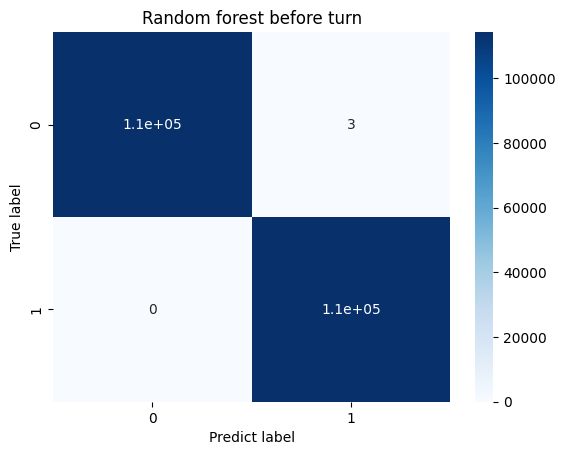

In [68]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, prediction_before)
import seaborn as sns
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
heatmap.set_xlabel('Predict label')
heatmap.set_ylabel('True label')
heatmap.set_title('Random forest before turn')
from sklearn.metrics import classification_report
report=classification_report(y_test, predictions)
print(report)

In [69]:
clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [70]:
clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



GridSearchCV(cv=5, estimator=RandomForestClassifier(max_features='auto'),
             n_jobs=-1, param_grid={'n_estimators': [50, 75, 100, 125, 150]},
             verbose=1)

In [71]:
print("Accuracy score on Validation set: \n")
print(clf.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(clf.best_params_)
print("---------------")
print(clf.best_estimator_)

Accuracy score on Validation set: 

0.9999924998124954
---------------
Best performing hyperparameters on Validation set: 
{'n_estimators': 50}
---------------
RandomForestClassifier(max_features='auto', n_estimators=50)


In [72]:
model = clf.best_estimator_

In [73]:
model

RandomForestClassifier(max_features='auto', n_estimators=50)

In [74]:
predictions = model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114310
           1       1.00      1.00      1.00    114256

    accuracy                           1.00    228566
   macro avg       1.00      1.00      1.00    228566
weighted avg       1.00      1.00      1.00    228566



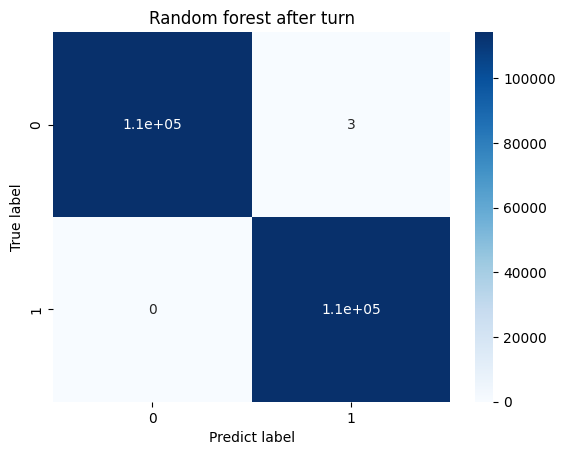

In [76]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
import seaborn as sns
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
heatmap.set_xlabel('Predict label')
heatmap.set_ylabel('True label')
heatmap.set_title('Random forest after turn')
from sklearn.metrics import classification_report
report=classification_report(y_test, predictions)
print(report)

In [77]:
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Xác suất dự đoán là Spam (lớp 1)

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score


precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
pr_auc = average_precision_score(y_test, y_pred_prob)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'PR-AUC: {pr_auc:.4f}')


Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
PR-AUC: 1.0000


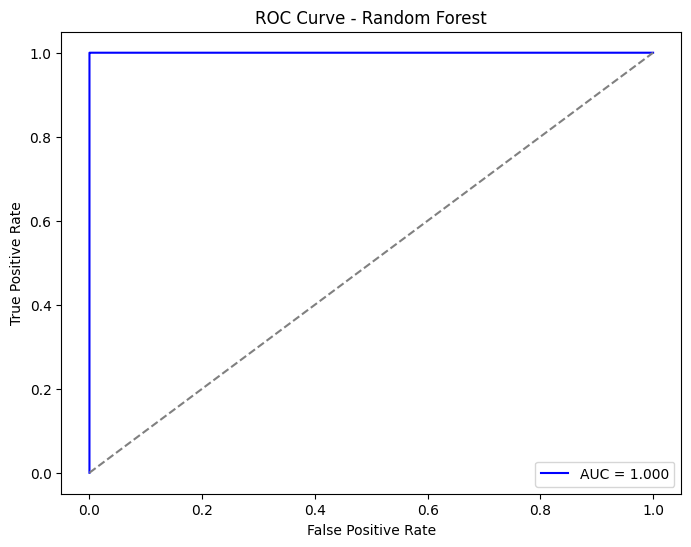

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Tính các giá trị True Positive Rate (TPR) & False Positive Rate (FPR)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Vẽ đồ thị ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Đường chéo ngẫu nhiên
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


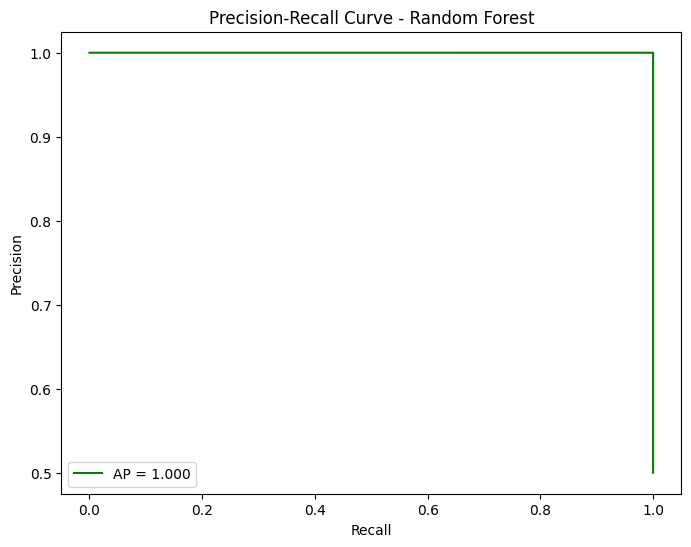

In [80]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
ap_score = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label=f'AP = {ap_score:.3f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.legend()
plt.show()


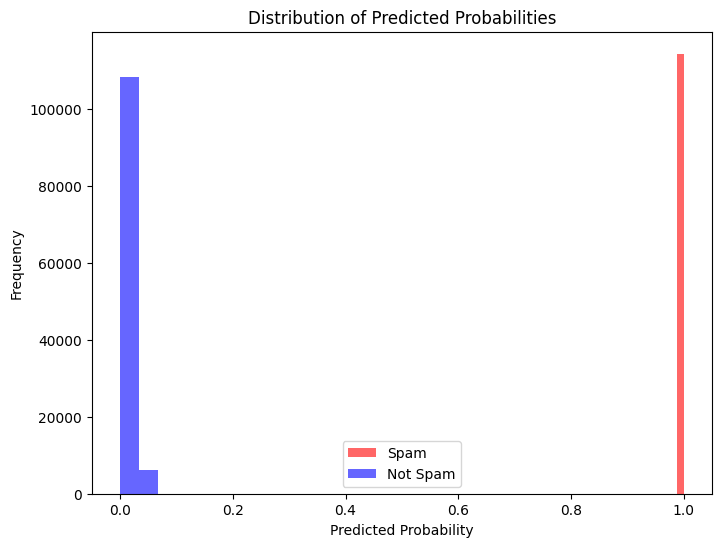

In [81]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob[y_test == 1], bins=30, alpha=0.6, color='red', label="Spam")
plt.hist(y_pred_prob[y_test == 0], bins=30, alpha=0.6, color='blue', label="Not Spam")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.legend()
plt.show()


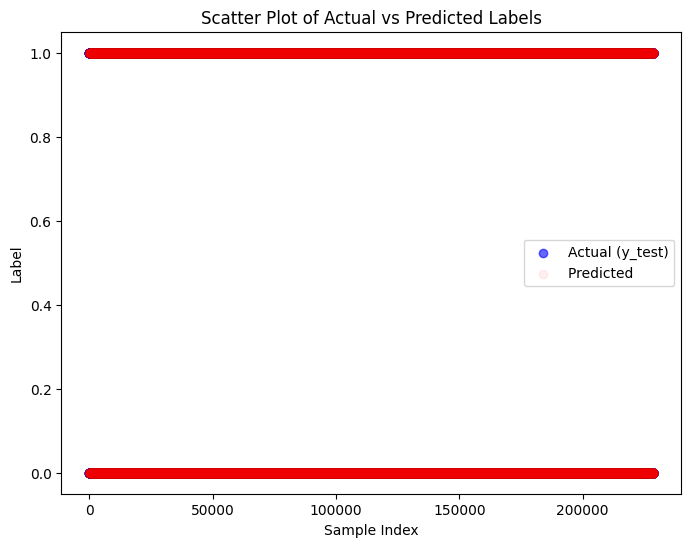

In [83]:
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(y_test)), y_test, color="blue", label="Actual (y_test)", alpha=0.6)
plt.scatter(np.arange(len(predictions)), predictions, color="red", label="Predicted ", alpha=0.06)

plt.xlabel("Sample Index")
plt.ylabel("Label")
plt.title("Scatter Plot of Actual vs Predicted Labels")
plt.legend()
plt.show()
